In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

from matplotlib import pyplot as plt

In [111]:
# each row is a list of features generated from the gradient of the current 30 secs interval and the previous 60 secs intervals

train = pd.read_csv("../../Data/flow_loop/samples/train_wzeek.csv")
train = train.drop(columns=('Unnamed: 0'))

test = pd.read_csv("../../Data/flow_loop/samples/test_wzeek.csv")
test = test.drop(columns=('Unnamed: 0'))

In [25]:
test.head()

,max_FIT102_Raw_Signal,min_FIT102_Raw_Signal,mean_FIT102_Raw_Signal,std_FIT102_Raw_Signal,max_FIT202_Raw_Signal,min_FIT202_Raw_Signal,mean_FIT202_Raw_Signal,std_FIT202_Raw_Signal,max_LIT101_Raw_Signal,min_LIT101_Raw_Signal,...,na_PIT101_Raw_Signal,na_PIT102_Raw_Signal,na_PIT201_Raw_Signal,na_PIT202_Raw_Signal,na_SI102_Raw_Signal,na_SI202_Raw_Signal,zeek_conn,event,binary,ternary
0,1.88,-2.94,0.013103,1.310434,42.56,-50.773333,0.990345,22.629679,4.64,-3.34,...,0,0,0,0,0,0,16.0,normal,normal,normal
1,1.80,-2.94,-0.027586,1.318878,42.56,-50.773333,0.225517,24.122445,4.64,-2.98,...,0,0,0,0,0,0,4.0,normal,normal,normal
2,1.80,-1.86,-0.044828,1.137147,42.54,-50.773333,-1.226207,20.792770,4.64,-3.54,...,0,0,0,0,0,0,4.0,normal,normal,normal
3,1.80,-1.80,-0.023448,1.150566,42.54,-50.773333,-0.968276,21.478168,4.92,-3.90,...,0,0,0,0,0,0,10.0,normal,normal,normal
4,2.28,-1.80,-0.006897,1.220390,42.54,-40.860000,0.080690,19.957387,4.92,-3.90,...,0,0,0,0,0,0,10.0,normal,normal,normal


In [26]:
train.head()

,max_FIT102_Raw_Signal,min_FIT102_Raw_Signal,mean_FIT102_Raw_Signal,std_FIT102_Raw_Signal,max_FIT202_Raw_Signal,min_FIT202_Raw_Signal,mean_FIT202_Raw_Signal,std_FIT202_Raw_Signal,max_LIT101_Raw_Signal,min_LIT101_Raw_Signal,...,na_PIT101_Raw_Signal,na_PIT102_Raw_Signal,na_PIT201_Raw_Signal,na_PIT202_Raw_Signal,na_SI102_Raw_Signal,na_SI202_Raw_Signal,zeek_conn,event,binary,ternary
0,4.08,-3.8,-0.056552,1.900707,3.82,-5.52,0.120000,2.399083,2.16,-2.38,...,0,0,0,0,0,0,7.0,normal,normal,normal
1,3.42,-3.8,-0.145517,1.691043,3.78,-5.52,-0.089655,2.070580,2.16,-2.12,...,0,0,0,0,0,0,7.0,normal,normal,normal
2,3.42,-4.9,0.065517,1.909038,3.78,-5.52,0.017241,1.875357,2.16,-2.12,...,0,0,0,0,0,0,7.0,normal,normal,normal
3,3.42,-4.9,0.035172,1.834936,3.78,-5.52,0.016552,2.018946,1.96,-2.12,...,0,0,0,0,0,0,4.0,normal,normal,normal
4,2.74,-4.9,0.017241,1.718943,3.20,-3.22,0.048966,1.533796,1.96,-2.04,...,0,0,0,0,0,0,5.0,normal,normal,normal


In [27]:
train.event.value_counts()

normal                    6346
SV_101                     570
HV_101                     357
SV_201                     276
LCV_103                    175
LCV_203                    154
overall_instrument_air     118
HV_201                      83
dos                         48
power                       45
SV_202_B                    29
SV_102_A                    15
Pumps                        9
injection                    8
LCV_202                      7
SV_102_B                     6
Name: event, dtype: int64

In [28]:
test.event.value_counts()

normal                    1091
HV_201                     234
LCV_103                     44
SV_201                      42
SV_101                      38
LCV_203                     33
dos                         30
injection                   16
power                       10
overall_instrument_air       6
Pumps                        6
Name: event, dtype: int64

In [47]:
train[train['event'] == 'dos']

,max_FIT102_Raw_Signal,min_FIT102_Raw_Signal,mean_FIT102_Raw_Signal,std_FIT102_Raw_Signal,max_FIT202_Raw_Signal,min_FIT202_Raw_Signal,mean_FIT202_Raw_Signal,std_FIT202_Raw_Signal,max_LIT101_Raw_Signal,min_LIT101_Raw_Signal,...,na_PIT101_Raw_Signal,na_PIT102_Raw_Signal,na_PIT201_Raw_Signal,na_PIT202_Raw_Signal,na_SI102_Raw_Signal,na_SI202_Raw_Signal,zeek_conn,event,binary,ternary
7366,3.18,-2.74,-0.045517,1.617449,4.82,-5.100000,0.193793,2.526851,4.00,-5.720000,...,1,1,1,1,1,1,3346.0,dos,abnormal,cyber
7367,3.18,-2.74,0.037241,1.538141,4.82,-5.100000,0.279310,2.475961,4.00,-5.720000,...,1,1,1,1,1,1,3346.0,dos,abnormal,cyber
7368,3.18,-2.74,-0.024828,1.420339,4.82,-5.100000,0.266207,2.439275,4.00,-5.720000,...,1,1,1,1,1,1,3346.0,dos,abnormal,cyber
7369,3.18,-2.74,0.035172,1.395305,4.78,-5.100000,0.141379,2.263095,4.00,-5.720000,...,1,1,1,1,1,1,3346.0,dos,abnormal,cyber
7370,3.18,-2.74,0.002069,1.342922,4.78,-4.520000,0.330345,2.023657,4.00,-5.720000,...,1,1,1,1,1,1,3346.0,dos,abnormal,cyber
7808,3.52,-4.14,-0.002069,1.902092,3.74,-5.400000,-0.038621,2.018521,6.58,-4.540000,...,0,0,0,0,0,0,8.0,dos,abnormal,cyber
7809,3.52,-4.14,0.067586,1.901273,3.74,-5.400000,-0.044828,2.167491,6.58,-4.540000,...,0,0,0,0,0,0,8.0,dos,abnormal,cyber
7810,3.52,-4.14,0.031034,1.775191,3.74,-5.400000,-0.161379,2.098843,6.58,-4.600000,...,0,0,0,0,0,0,3254.0,dos,abnormal,cyber
7811,3.52,-4.14,0.005517,1.806187,4.58,-5.400000,0.015172,2.192531,6.58,-4.600000,...,0,0,0,0,0,0,3254.0,dos,abnormal,cyber
7812,3.52,-4.14,0.121379,1.847647,4.58,-3.060000,-0.102759,1.932783,6.58,-4.600000,...,0,0,0,0,0,0,3254.0,dos,abnormal,cyber


In [112]:
na_cols = [name for name in train.columns if 'na_' in name]

In [99]:
na_cols

['na_FIT102_Raw_Signal',
 'na_FIT202_Raw_Signal',
 'na_LIT101_Raw_Signal',
 'na_LIT201_Raw_Signal',
 'na_PIT101_Raw_Signal',
 'na_PIT102_Raw_Signal',
 'na_PIT201_Raw_Signal',
 'na_PIT202_Raw_Signal',
 'na_SI102_Raw_Signal',
 'na_SI202_Raw_Signal']

In [113]:
train_new = train.drop(columns=na_cols)
test_new = test.drop(columns=na_cols)

In [84]:
train_events = train['event'].unique()
test_events = test['event'].unique()

In [87]:
miss_cols = [name for name in train_events if name not in test_events]
miss_cols

['HV_101', 'SV_102_A', 'SV_102_B', 'SV_202_B', 'LCV_202']

In [93]:
list(test_events)

['normal',
 'power',
 'overall_instrument_air',
 'LCV_203',
 'LCV_103',
 'SV_101',
 'HV_201',
 'Pumps',
 'SV_201',
 'dos',
 'injection']

In [97]:
train = train[train['event'].isin(list(test_events))]

## neural network

In [101]:
def processing(df, num_classes):
    ohe_df = pd.get_dummies(df)
    features = df.drop(columns=(['event', 'binary', 'ternary']))
    binary_cols = [name for name in list(ohe_df.columns) if 'binary' in name]
    ternary_cols = [name for name in list(ohe_df.columns) if 'ternary' in name]
    multi_cols = [name for name in list(ohe_df.columns) if 'event' in name]
    if num_classes == 2:
        targets = ohe_df[binary_cols]
        columns = binary_cols   
    elif num_classes == 3:
        targets = ohe_df[ternary_cols]
        columns = ternary_cols
    else:
        targets = ohe_df[multi_cols]
        columns = multi_cols
    return features, targets, columns 

In [20]:
def prepare_train_test(features, targets, test_size = 0.2):
    X_train, X_test, y_train, y_test = train_test_split(features, targets, 
                                                    random_state= 12345, test_size=0.2, 
                                                    stratify=targets)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)    
    return X_train, X_test, y_train, y_test

def eval_model(model, columns):
    prediction = model.predict(X_test)
    prediction_array = (prediction == prediction.max(axis=1)[:, None]).astype(int)
    
    prediction_list = []
    true_list = []
    for i in prediction_array.argmax(axis=1):
        prediction_list.append([columns[i]])
    for i in np.array(y_test).argmax(axis=1):
        true_list.append([columns[i]])
    # classification report
    print(classification_report(y_test, prediction_array, target_names=columns))
    
    # plot confusion matrix
    cm = confusion_matrix(true_list, prediction_list)
    cm_df = pd.DataFrame(cm, index=columns, columns=columns)
    plt.figure(figsize=(10,8))
    sns.heatmap(cm_df, annot=True)
    plt.title('Confusion Matrix')
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()
    return
    

### binary classifier

In [102]:
X_train, y_train, columns = processing(train_new, 2)
X_test, y_test, columns = processing(test_new, 2)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 


In [103]:
X_test.shape

(1550, 41)

In [104]:
model = keras.models.Sequential()
layer1 = keras.layers.Dense(32, input_dim=X_train.shape[1], activation='relu')
layer2 = keras.layers.Dense(32, activation='relu')
output = keras.layers.Dense(2, activation='softmax')
model.add(layer1)
model.add(layer2)
model.add(output)

model.compile("adam", "categorical_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train, 
          validation_data=(X_test, y_test), 
          epochs=100, verbose=2)

Epoch 1/100
245/245 - 1s - loss: 0.3416 - accuracy: 0.8853 - val_loss: 0.3725 - val_accuracy: 0.8452 - 619ms/epoch - 3ms/step
Epoch 2/100
245/245 - 0s - loss: 0.2725 - accuracy: 0.9045 - val_loss: 0.3256 - val_accuracy: 0.8555 - 259ms/epoch - 1ms/step
Epoch 3/100
245/245 - 0s - loss: 0.2466 - accuracy: 0.9193 - val_loss: 0.3167 - val_accuracy: 0.8729 - 282ms/epoch - 1ms/step
Epoch 4/100
245/245 - 0s - loss: 0.2314 - accuracy: 0.9257 - val_loss: 0.3102 - val_accuracy: 0.8800 - 261ms/epoch - 1ms/step
Epoch 5/100
245/245 - 0s - loss: 0.2152 - accuracy: 0.9284 - val_loss: 0.3309 - val_accuracy: 0.8581 - 270ms/epoch - 1ms/step
Epoch 6/100
245/245 - 0s - loss: 0.2040 - accuracy: 0.9309 - val_loss: 0.3280 - val_accuracy: 0.8716 - 303ms/epoch - 1ms/step
Epoch 7/100
245/245 - 0s - loss: 0.2003 - accuracy: 0.9330 - val_loss: 0.3751 - val_accuracy: 0.8542 - 257ms/epoch - 1ms/step
Epoch 8/100
245/245 - 0s - loss: 0.1873 - accuracy: 0.9339 - val_loss: 0.3669 - val_accuracy: 0.8716 - 263ms/epoch - 1

49/49 [==============================] - 0s 844us/step
                 precision    recall  f1-score   support

binary_abnormal       0.81      0.80      0.81       459
  binary_normal       0.92      0.92      0.92      1091

      micro avg       0.89      0.89      0.89      1550
      macro avg       0.86      0.86      0.86      1550
   weighted avg       0.89      0.89      0.89      1550
    samples avg       0.89      0.89      0.89      1550



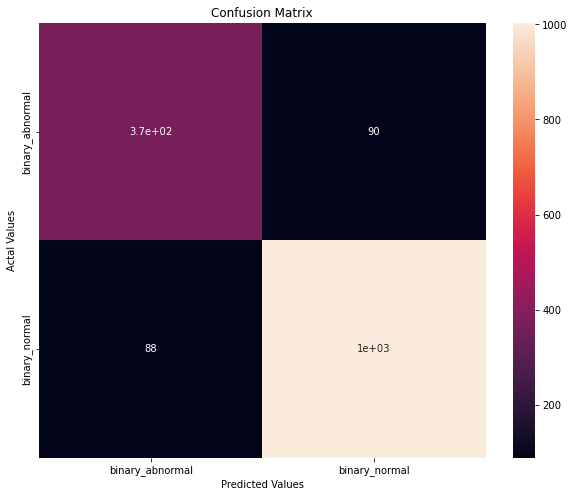

In [105]:
eval_model(model, columns)

### Ternary

In [115]:
X_train, y_train, columns = processing(train_new, 3)
X_test, y_test, columns = processing(test_new, 3)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

In [136]:
model = keras.models.Sequential()
layer1 = keras.layers.Dense(32, input_dim=X_train.shape[1], activation='relu')
layer2 = keras.layers.Dense(32, activation='relu')
output = keras.layers.Dense(3, activation='softmax')
model.add(layer1)
model.add(layer2)
model.add(output)

model.compile("adam", "categorical_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train, 
          validation_data=(X_test, y_test), 
          epochs=100, verbose=2)

Epoch 1/100
258/258 - 1s - loss: 0.5836 - accuracy: 0.8018 - val_loss: 0.5311 - val_accuracy: 0.8284 - 601ms/epoch - 2ms/step
Epoch 2/100
258/258 - 0s - loss: 0.3332 - accuracy: 0.8859 - val_loss: 0.4949 - val_accuracy: 0.8477 - 257ms/epoch - 998us/step
Epoch 3/100
258/258 - 0s - loss: 0.2972 - accuracy: 0.8984 - val_loss: 0.4734 - val_accuracy: 0.8497 - 295ms/epoch - 1ms/step
Epoch 4/100
258/258 - 0s - loss: 0.2766 - accuracy: 0.9088 - val_loss: 0.4978 - val_accuracy: 0.8490 - 305ms/epoch - 1ms/step
Epoch 5/100
258/258 - 0s - loss: 0.2596 - accuracy: 0.9157 - val_loss: 0.5384 - val_accuracy: 0.8484 - 275ms/epoch - 1ms/step
Epoch 6/100
258/258 - 0s - loss: 0.2472 - accuracy: 0.9187 - val_loss: 0.5611 - val_accuracy: 0.8594 - 300ms/epoch - 1ms/step
Epoch 7/100
258/258 - 0s - loss: 0.2392 - accuracy: 0.9204 - val_loss: 0.6197 - val_accuracy: 0.8516 - 270ms/epoch - 1ms/step
Epoch 8/100
258/258 - 0s - loss: 0.2309 - accuracy: 0.9232 - val_loss: 0.6898 - val_accuracy: 0.8658 - 274ms/epoch -

49/49 [==============================] - 0s 786us/step
                    precision    recall  f1-score   support

     ternary_cyber       1.00      0.59      0.74        46
ternary_mechanical       0.77      0.88      0.82       413
    ternary_normal       0.95      0.91      0.93      1091

         micro avg       0.89      0.89      0.89      1550
         macro avg       0.90      0.79      0.83      1550
      weighted avg       0.90      0.89      0.89      1550
       samples avg       0.89      0.89      0.89      1550



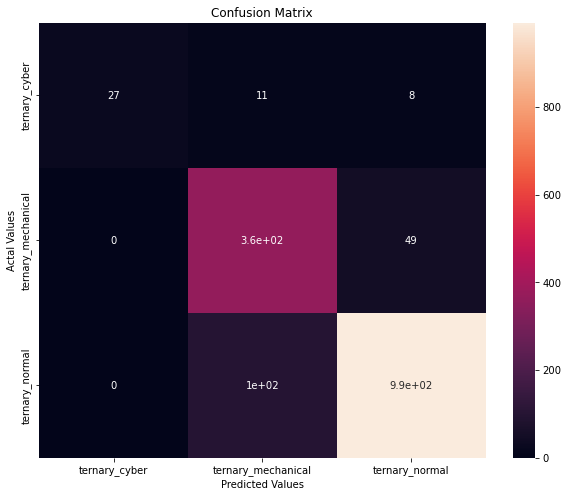

In [137]:
eval_model(model, columns)

## multi classes

In [138]:
train_new = train_new[train_new['event'].isin(list(test_events))]
X_train, y_train, columns = processing(train_new, 17)
X_test, y_test, columns = processing(test_new, 17)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

In [148]:
model = keras.models.Sequential()
layer1 = keras.layers.Dense(80, input_dim=X_train.shape[1], activation='relu')
layer2 = keras.layers.Dense(40, activation='relu')
#layer3 = keras.layers.Dense(64, activation='relu')

output = keras.layers.Dense(11, activation='softmax')
model.add(layer1)
model.add(layer2)
#model.add(layer3)
model.add(output)

model.compile("adam", "categorical_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train, 
          validation_data=(X_test, y_test), 
          epochs=100, verbose=2)

Epoch 1/100
245/245 - 1s - loss: 0.8429 - accuracy: 0.8216 - val_loss: 1.0636 - val_accuracy: 0.7516 - 614ms/epoch - 3ms/step
Epoch 2/100
245/245 - 0s - loss: 0.4587 - accuracy: 0.8814 - val_loss: 1.0880 - val_accuracy: 0.7948 - 349ms/epoch - 1ms/step
Epoch 3/100
245/245 - 0s - loss: 0.3994 - accuracy: 0.8962 - val_loss: 1.1423 - val_accuracy: 0.7671 - 273ms/epoch - 1ms/step
Epoch 4/100
245/245 - 0s - loss: 0.3607 - accuracy: 0.9087 - val_loss: 1.1976 - val_accuracy: 0.7671 - 281ms/epoch - 1ms/step
Epoch 5/100
245/245 - 0s - loss: 0.3363 - accuracy: 0.9174 - val_loss: 1.3050 - val_accuracy: 0.7723 - 248ms/epoch - 1ms/step
Epoch 6/100
245/245 - 0s - loss: 0.3194 - accuracy: 0.9183 - val_loss: 1.3357 - val_accuracy: 0.7774 - 271ms/epoch - 1ms/step
Epoch 7/100
245/245 - 0s - loss: 0.2983 - accuracy: 0.9212 - val_loss: 1.4198 - val_accuracy: 0.7813 - 325ms/epoch - 1ms/step
Epoch 8/100
245/245 - 0s - loss: 0.2868 - accuracy: 0.9212 - val_loss: 1.5002 - val_accuracy: 0.7574 - 254ms/epoch - 1

KeyboardInterrupt: 

49/49 [==============================] - 0s 861us/step
                              precision    recall  f1-score   support

                event_HV_201       1.00      0.15      0.27       234
               event_LCV_103       1.00      0.89      0.94        44
               event_LCV_203       0.47      0.67      0.55        33
                 event_Pumps       0.00      0.00      0.00         6
                event_SV_101       0.05      0.39      0.10        38
                event_SV_201       0.67      0.33      0.44        42
                   event_dos       1.00      0.50      0.67        30
             event_injection       0.00      0.00      0.00        16
                event_normal       0.92      0.93      0.92      1091
event_overall_instrument_air       0.40      0.33      0.36         6
                 event_power       0.00      0.00      0.00        10

                   micro avg       0.75      0.75      0.75      1550
                   macro avg     

C:\Users\Wang\Anaconda3\envs\epri\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


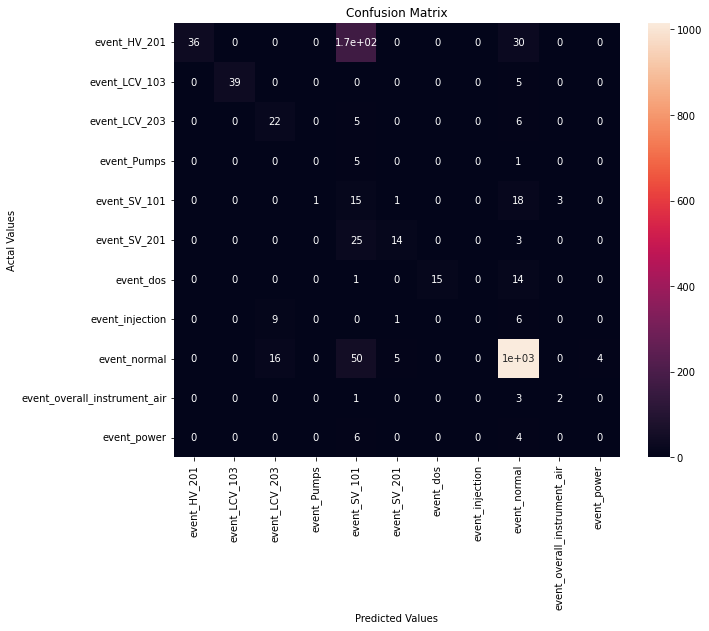

In [144]:
eval_model(model, columns)